<a href="https://colab.research.google.com/github/allaltune/HCSPD_2024/blob/main/Actividad_2_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 2 - Módulo 1

**Autor: ** Walter Allaltune
**Link a repositorio GitHub**: https://github.com/allaltune/HCSPD_2024/tree/main/Semana%202

## Actividad 1

Se solicita obtener el sistema lineal en variables de estado para el equilibrio
$x=\begin{matrix}[0& 0& 0& 0]^T\end{matrix}$.

In [1]:
!apt install octave #Instala octave en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [2]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';

u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%Altura
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'VarsAvion_temporal','-r300','-dpng');
save('Verificacion_Num_1Avion.mat','-v7');

Writing Avion_Num.m


In [3]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Writing modavion.m


In [4]:
# -W : no window system
!octave -W Avion_Num.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

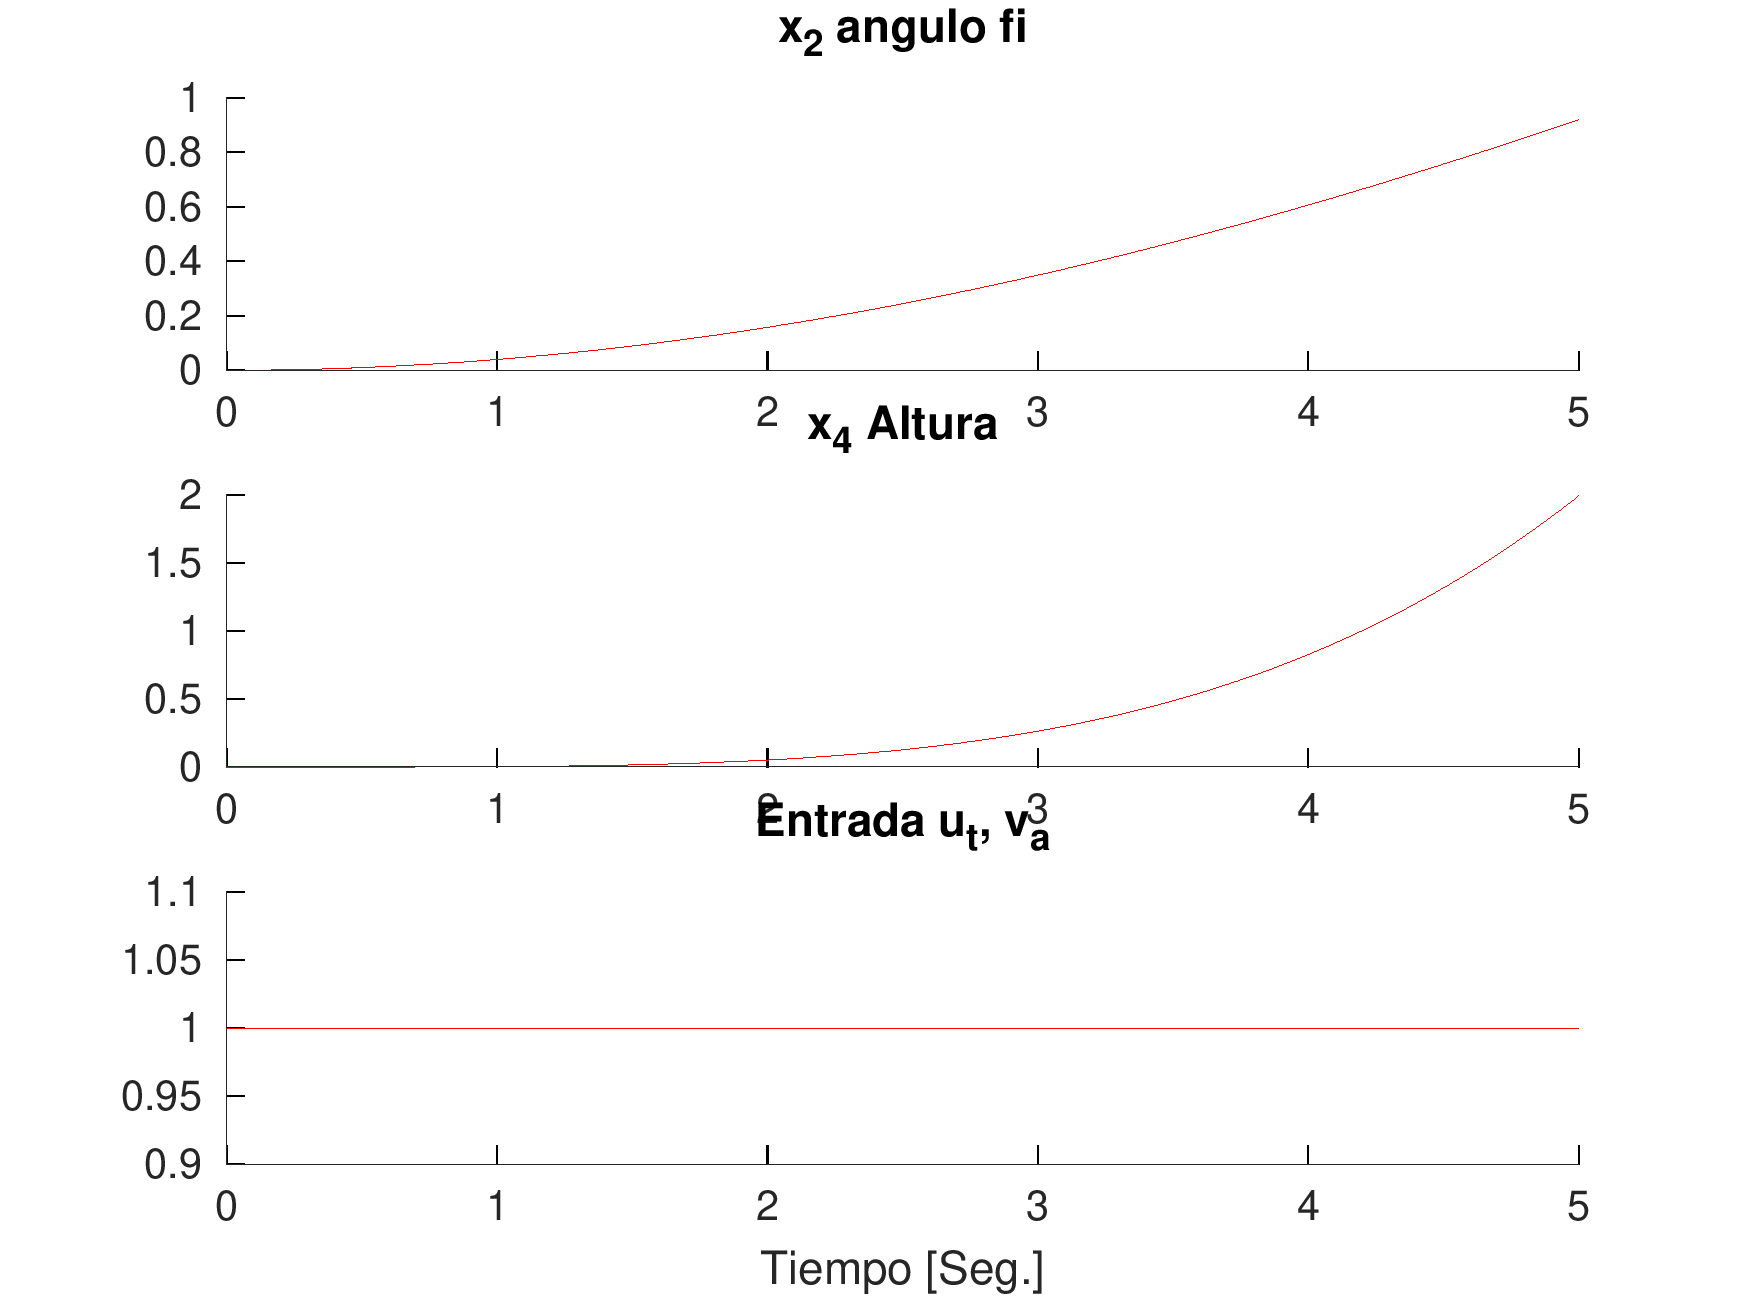

In [5]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal.png")
imt